In [ ]:
import pandas as pd
import numpy as np
import skimage.io as sk
from skimage import img_as_ubyte
from skimage.io import imread
from scipy import spatial
from tensorflow.keras.layers import Dense, Flatten, Input, Lambda, MaxPooling2D, Conv2D, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from PIL import Image
import cv2
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import glob, os
# import shutil
# from pathlib import Path

# path = Path("/content/drive/My Drive/project_dataset/sign_data/train/train")

# for filename in path.glob('*/'):
#     p = ""
#     if str(filename).find('real') == -1 or str(filename).find('forged') == -1:
#         if str(filename).find('_forg') != -1:
#             p = r"/content/drive/My Drive/project_dataset/sign_data/train/forg"
#         else:
#             p = r"/content/drive/My Drive/project_dataset/sign_data/train/real"

#         allfiles = os.listdir(filename)
#         for f in allfiles:
#               if os.path.isfile(f) == False:
#                     src_path = os.path.join(filename, f)
#                     dst_path = os.path.join(p, f)
#                     print(src_path + "\t\t" + dst_path)
#                     shutil.move(src_path, dst_path)

In [ ]:
# import glob, os
# import shutil
# from pathlib import Path

# path = Path("/content/drive/My Drive/project_dataset/sign_data/test/test")

# for filename in path.glob('*/'):
#     p = ""
#     if str(filename).find('real') == -1 or str(filename).find('forged') == -1:
#         if str(filename).find('_forg') != -1:
#             p = r"/content/drive/My Drive/project_dataset/sign_data/test/forged"
#         else:
#             p = r"/content/drive/My Drive/project_dataset/sign_data/test/real"

#         allfiles = os.listdir(filename)
#         for f in allfiles:
#               if os.path.isfile(f) == False:
#                     src_path = os.path.join(filename, f)
#                     dst_path = os.path.join(p, f)
#                     print(src_path + "\t\t" + dst_path)
#                     shutil.move(src_path, dst_path)

(319, 793, 3)


Text(0.5, 1.0, 'Forge_1')

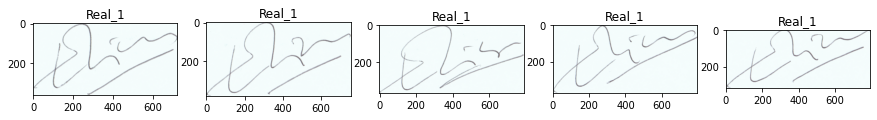

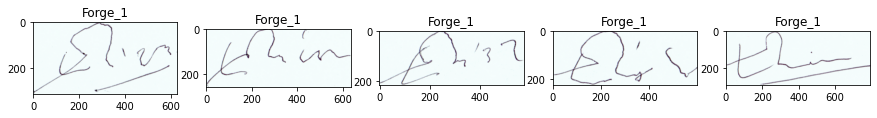

In [ ]:
image1 = sk.imread("/content/drive/My Drive/project_dataset/sign_data/train/real/001_01.PNG")
image2 = sk.imread("/content/drive/My Drive/project_dataset/sign_data/train/real/001_02.PNG")
image3 = sk.imread("/content/drive/My Drive/project_dataset/sign_data/train/real/001_03.PNG")
image4 = sk.imread("/content/drive/My Drive/project_dataset/sign_data/train/real/001_04.PNG")
image5 = sk.imread("/content/drive/My Drive/project_dataset/sign_data/train/real/001_05.PNG")

fig, ax = plt.subplots(1,5, figsize = (15,10))
ax[0].imshow(image1)
ax[0].set_title("Real_1")
ax[1].imshow(image2)
ax[1].set_title("Real_1")
ax[2].imshow(image3)
ax[2].set_title("Real_1")
ax[3].imshow(image4)
ax[3].set_title("Real_1")
ax[4].imshow(image5)
ax[4].set_title("Real_1")

image6 = sk.imread("/content/drive/My Drive/project_dataset/sign_data/train/forged/0119001_01.png")
image7 = sk.imread("/content/drive/My Drive/project_dataset/sign_data/train/forged/0119001_02.png")
image8 = sk.imread("/content/drive/My Drive/project_dataset/sign_data/train/forged/0119001_03.png")
image9 = sk.imread("/content/drive/My Drive/project_dataset/sign_data/train/forged/0119001_04.png")
image10 = sk.imread("/content/drive/My Drive/project_dataset/sign_data/train/forged/0201001_01.png")

fig, ax1 = plt.subplots(1,5, figsize = (15,10))
ax1[0].imshow(image6)
ax1[0].set_title("Forge_1")
ax1[1].imshow(image7)
ax1[1].set_title("Forge_1")
ax1[2].imshow(image8)
ax1[2].set_title("Forge_1")
ax1[3].imshow(image9)
ax1[3].set_title("Forge_1")
ax1[4].imshow(image10)
ax1[4].set_title("Forge_1")

In [ ]:
train_path = '/content/drive/MyDrive/project_dataset/sign_data/train'
test_path = '/content/drive/MyDrive/project_dataset/sign_data/test'

In [ ]:
Image_Width = 512
Image_Height = 512
Image_Size = (Image_Width, Image_Height)
Image_Channel = 3
batch_size=32

In [ ]:
model = Sequential()

## Conv layer 1
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(Image_Width,Image_Height, Image_Channel)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

## Conv layer 2
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

## Conv layer 3
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

## Conv layer 4
model.add(Conv2D(256, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

## Conv layer 5
model.add(Conv2D(256, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

## Conv layer 6
model.add(Conv2D(512, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 510, 510, 32)      896       
                                                                 
 batch_normalization_14 (Bat  (None, 510, 510, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 255, 255, 32)     0         
 g2D)                                                            
                                                                 
 dropout_14 (Dropout)        (None, 255, 255, 32)      0         
                                                                 
 conv2d_13 (Conv2D)          (None, 253, 253, 64)      18496     
                                                                 
 batch_normalization_15 (Bat  (None, 253, 253, 64)    

In [ ]:
# from scipy import ndimage
# from skimage.filters import threshold_otsu   

# def our_preprocessing_function(img):
#     grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     blur_radius = 0.8
#     img = ndimage.gaussian_filter(grey, blur_radius)  # to remove small components or noise
#     thres = threshold_otsu(img)
#     binimg = img > thres
#     binimg = np.logical_not(binimg)
#     return grey

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience=2, verbose=1, factor=0.5, min_lr=0.0005)
callbacks = [early_stop, learning_rate_reduction]

In [ ]:
# Scaling all the images between 0 to 1 and applying Data Augmentation
train_datagen = ImageDataGenerator(rotation_range=15,
                                  rescale=1./255,
                                  shear_range=0.1,
                                  horizontal_flip=True,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1, brightness_range=[0.3,1.2])

Found 1633 images belonging to 2 classes.


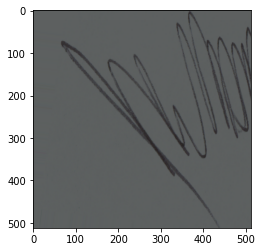

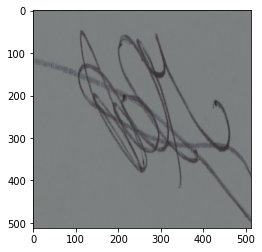

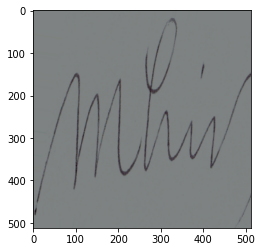

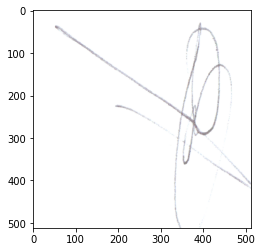

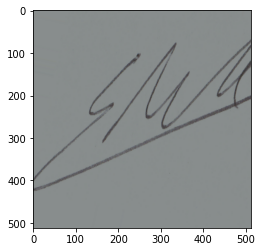

In [ ]:
train_generator = train_datagen.flow_from_directory(train_path,
                                              target_size=Image_Size,
                                              batch_size=32,
                                              class_mode = 'categorical')
x= train_generator.next()
for i in range(0,5):
    image = x[0][i]
    plt.imshow(image)
    plt.show()

In [ ]:
# Performing only scaling on the test dataset
test_datagen = ImageDataGenerator(rescale=1./255)

Found 500 images belonging to 2 classes.


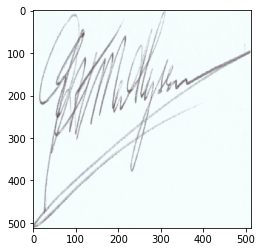

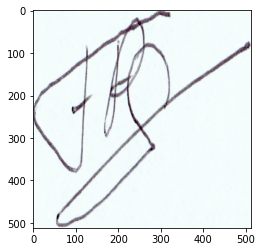

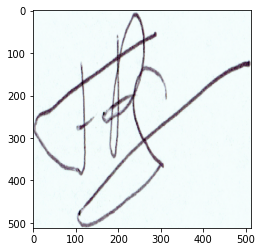

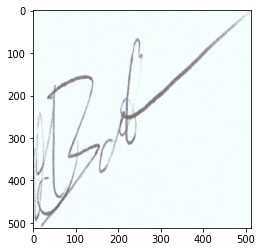

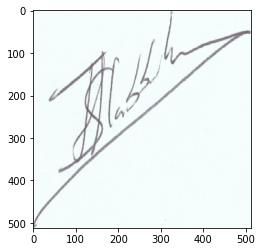

In [ ]:
test_generator = test_datagen.flow_from_directory(test_path,
                                                  target_size=Image_Size,
                                                  batch_size = 32,
                                                  class_mode='categorical')

x= test_generator.next()
for i in range(0,5):
    image = x[0][i]
    plt.imshow(image)
    plt.show()

In [ ]:
history = model.fit(train_generator,
                             epochs=10,
                             validation_data=test_generator,
                             validation_steps=len(test_generator),
                             steps_per_epoch=len(train_generator),
                             callbacks=callbacks)

Epoch 1/10
52/52 [==============================] - 120s 2s/step - loss: 0.3695 - accuracy: 0.9057 - val_loss: 0.3752 - val_accuracy: 0.8640 - lr: 5.0000e-04
Epoch 2/10
52/52 [==============================] - 121s 2s/step - loss: 0.1430 - accuracy: 0.9449 - val_loss: 0.9092 - val_accuracy: 0.6860 - lr: 5.0000e-04
Epoch 3/10
52/52 [==============================] - 121s 2s/step - loss: 0.1156 - accuracy: 0.9553 - val_loss: 0.4563 - val_accuracy: 0.8100 - lr: 5.0000e-04
Epoch 4/10
52/52 [==============================] - 120s 2s/step - loss: 0.1096 - accuracy: 0.9553 - val_loss: 0.6426 - val_accuracy: 0.7280 - lr: 5.0000e-04
Epoch 5/10
52/52 [==============================] - 119s 2s/step - loss: 0.0907 - accuracy: 0.9620 - val_loss: 0.1127 - val_accuracy: 0.9540 - lr: 5.0000e-04
Epoch 6/10
52/52 [==============================] - 118s 2s/step - loss: 0.0982 - accuracy: 0.9657 - val_loss: 0.0744 - val_accuracy: 0.9640 - lr: 5.0000e-04
Epoch 7/10
52/52 [==============================] - 

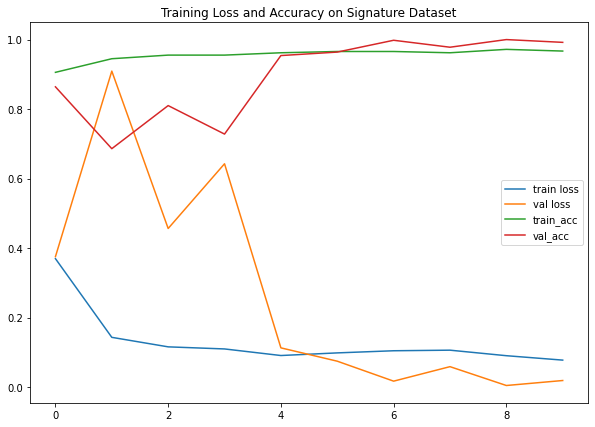

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title("Training Loss and Accuracy on Signature Dataset")
plt.legend()
plt.show()
plt.savefig('kaggle_loss_val_plot')

In [ ]:
from tensorflow.keras.models import load_model

model.save('signature_model_final.h5')
!cp './signature_model_final.h5' '/content/drive/My Drive/project_dataset/sign_data'

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model

model = load_model('/content/drive/My Drive/project_dataset/sign_data/signature_model_final.h5')
loss, acc = model.evaluate(test_generator, steps=3, verbose=1)
print(acc)

3/3 [==============================] - 24s 7s/step - loss: 0.0112 - accuracy: 1.0000
1.0


In [ ]:
from tensorflow.keras.preprocessing import image
#from tensorflow.keras.applications.resnet50 import preprocess_input

img = image.load_img('/content/drive/MyDrive/project_dataset/sign_data/test/forged/04_0210052.PNG', target_size=(512,512))
x = image.img_to_array(img)
# print(x.shape)
x = x/255
x=np.expand_dims(x,axis=0)
z = model.predict(x)
a=np.argmax(z, axis=1)
# print(z)
# print(a)
if(a==1):
    print("The signature is not fraud")
else:
    print("The signature is fraud")

1/1 [==============================] - 0s 167ms/step
The signature is fraud


**CEDAR DATASET TRAINING AND EVALUATION**

(438, 552, 3)


Text(0.5, 1.0, 'Forge_1')

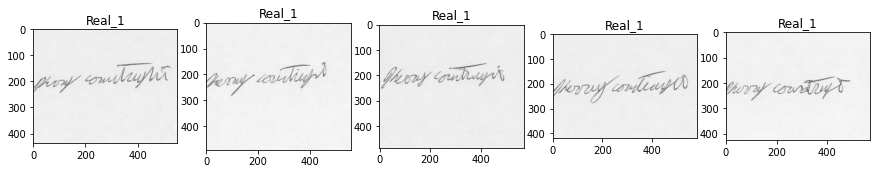

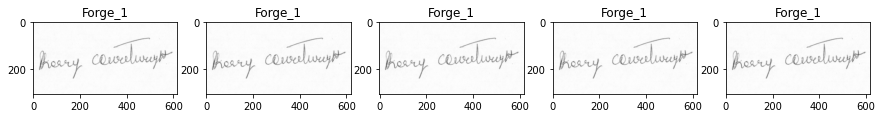

In [ ]:
image1 = sk.imread("/content/drive/My Drive/project_dataset/cedar/full_org/original_55_1.png")
image2 = sk.imread("/content/drive/My Drive/project_dataset/cedar/full_org/original_55_2.png")
image3 = sk.imread("/content/drive/My Drive/project_dataset/cedar/full_org/original_55_3.png")
image4 = sk.imread("/content/drive/My Drive/project_dataset/cedar/full_org/original_55_4.png")
image5 = sk.imread("/content/drive/My Drive/project_dataset/cedar/full_org/original_55_5.png")

fig, ax = plt.subplots(1,5, figsize = (15,10))
ax[0].imshow(image1)
ax[0].set_title("Real_1")
ax[1].imshow(image2)
ax[1].set_title("Real_1")
ax[2].imshow(image3)
ax[2].set_title("Real_1")
ax[3].imshow(image4)
ax[3].set_title("Real_1")
ax[4].imshow(image5)
ax[4].set_title("Real_1")

image6 = sk.imread("/content/drive/My Drive/project_dataset/cedar/full_forg/forgeries_55_1.png")
image7 = sk.imread("/content/drive/My Drive/project_dataset/cedar/full_forg/forgeries_55_1.png")
image8 = sk.imread("/content/drive/My Drive/project_dataset/cedar/full_forg/forgeries_55_1.png")
image9 = sk.imread("/content/drive/My Drive/project_dataset/cedar/full_forg/forgeries_55_1.png")
image10 = sk.imread("/content/drive/My Drive/project_dataset/cedar/full_forg/forgeries_55_1.png")

fig, ax1 = plt.subplots(1,5, figsize = (15,10))
ax1[0].imshow(image6)
ax1[0].set_title("Forge_1")
ax1[1].imshow(image7)
ax1[1].set_title("Forge_1")
ax1[2].imshow(image8)
ax1[2].set_title("Forge_1")
ax1[3].imshow(image9)
ax1[3].set_title("Forge_1")
ax1[4].imshow(image10)
ax1[4].set_title("Forge_1")

In [ ]:
data = "/content/drive/My Drive/project_dataset/cedar"
Image_Width = 512
Image_Height = 512
Image_Size = (Image_Width, Image_Height)
Image_Channel = 3
batch_size=32

In [ ]:
model = Sequential()

## Conv layer 1
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(Image_Width, Image_Height, Image_Channel)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

## Conv layer 2
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

## Conv layer 3
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

## Conv layer 4
model.add(Conv2D(256, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

## Conv layer 5
model.add(Conv2D(256, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

## Conv layer 6
model.add(Conv2D(512, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

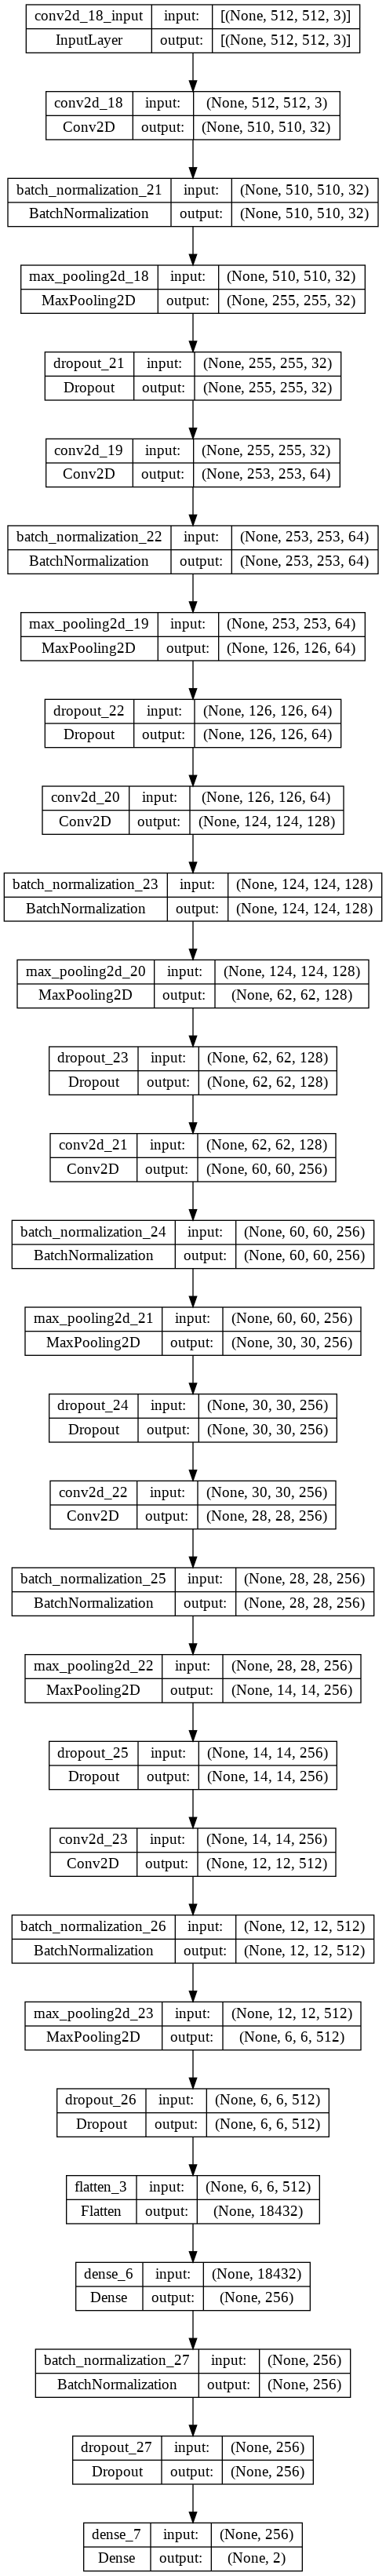

In [ ]:
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=2, verbose=1, factor=0.5, min_lr=0.00001)
callbacks = [early_stop, learning_rate_reduction]

In [ ]:
# !pip install split-folders
# import splitfolders

# splitfolders.ratio(data, output=data, seed=1337, ratio=(.8, .2), group_prefix=None, move=False) # default values

Found 2112 images belonging to 2 classes.


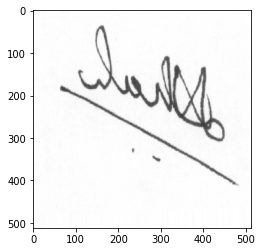

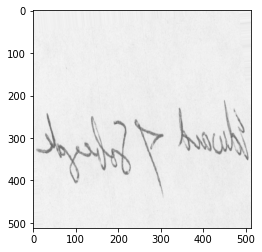

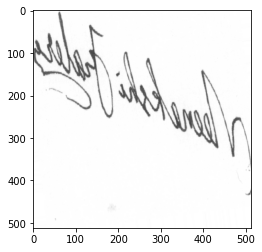

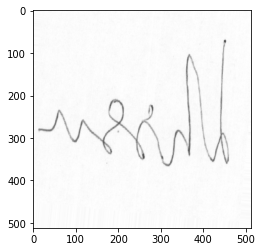

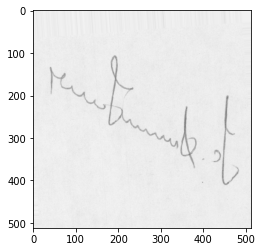

In [ ]:
train_datagen = ImageDataGenerator(rotation_range=10,
                                  rescale=1./255,
                                  shear_range=0.1,
                                  horizontal_flip=True,
                                  width_shift_range=0.1)

train_generator = train_datagen.flow_from_directory(data+"/train", target_size=Image_Size,
                                              batch_size=32, class_mode = 'categorical')

x= train_generator.next()
for i in range(0,5):
    image = x[0][i]
    plt.imshow(image)
    plt.show()

Found 528 images belonging to 2 classes.


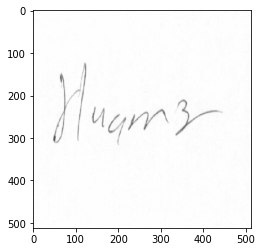

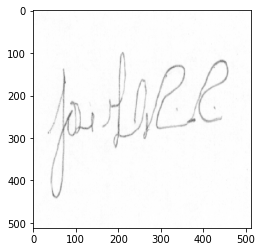

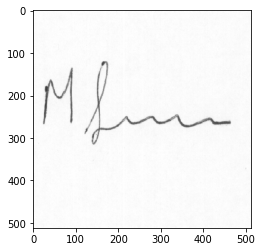

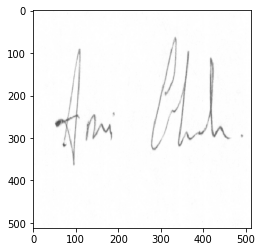

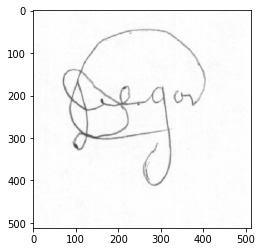

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(data+"/val", target_size=Image_Size, batch_size=32, class_mode = 'categorical')

x= test_generator.next()
for i in range(0,5):
    image = x[0][i]
    plt.imshow(image)
    plt.show()

In [ ]:
history = model.fit(train_generator, epochs=10, validation_data=test_generator,
                     validation_steps=len(test_generator), steps_per_epoch=len(train_generator), callbacks=callbacks)

Epoch 1/10
66/66 [==============================] - ETA: 0s - loss: 0.0455 - accuracy: 0.9872

66/66 [==============================] - 121s 2s/step - loss: 0.0455 - accuracy: 0.9872 - val_loss: 5.9434 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/10
66/66 [==============================] - ETA: 0s - loss: 0.0437 - accuracy: 0.9877

66/66 [==============================] - 119s 2s/step - loss: 0.0437 - accuracy: 0.9877 - val_loss: 3.2071 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/10
66/66 [==============================] - ETA: 0s - loss: 0.0180 - accuracy: 0.9953

66/66 [==============================] - 121s 2s/step - loss: 0.0180 - accuracy: 0.9953 - val_loss: 0.3065 - val_accuracy: 0.8561 - lr: 0.0010
Epoch 4/10
66/66 [==============================] - ETA: 0s - loss: 0.0077 - accuracy: 0.9986

66/66 [==============================] - 122s 2s/step - loss: 0.0077 - accuracy: 0.9986 - val_loss: 0.0103 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 5/10
66/66 [==============================] - ETA: 0s - loss: 0.0236 - accuracy: 0.9934

66/66 [==============================] - 121s 2s/step - loss: 0.0236 - accuracy: 0.9934 - val_loss: 0.1600 - val_accuracy: 0.9129 - lr: 0.0010
Epoch 6/10
66/66 [==============================] - ETA: 0s - loss: 0.0103 - accuracy: 0.9962

66/66 [==============================] - 121s 2s/step - loss: 0.0103 - accuracy: 0.9962 - val_loss: 0.2638 - val_accuracy: 0.8788 - lr: 0.0010
Epoch 7/10
66/66 [==============================] - ETA: 0s - loss: 0.0112 - accuracy: 0.9967

66/66 [==============================] - 121s 2s/step - loss: 0.0112 - accuracy: 0.9967 - val_loss: 0.0050 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 8/10
66/66 [==============================] - ETA: 0s - loss: 0.0133 - accuracy: 0.9967

66/66 [==============================] - 119s 2s/step - loss: 0.0133 - accuracy: 0.9967 - val_loss: 0.0634 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 9/10
66/66 [==============================] - ETA: 0s - loss: 0.0076 - accuracy: 0.9981

66/66 [==============================] - 122s 2s/step - loss: 0.0076 - accuracy: 0.9981 - val_loss: 0.8361 - val_accuracy: 0.7803 - lr: 0.0010
Epoch 10/10
66/66 [==============================] - ETA: 0s - loss: 9.2147e-04 - accuracy: 1.0000

66/66 [==============================] - 120s 2s/step - loss: 9.2147e-04 - accuracy: 1.0000 - val_loss: 0.3187 - val_accuracy: 0.9129 - lr: 0.0010


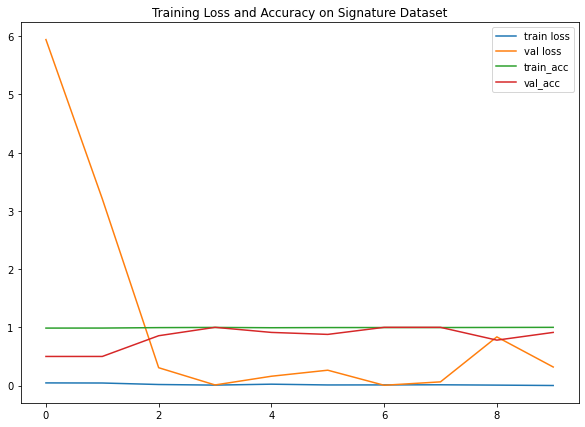

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title("Training Loss and Accuracy on Signature Dataset")
plt.legend()
plt.show()
plt.savefig('cedar_loss_val_plot')

In [ ]:
from tensorflow.keras.models import load_model

model.save('signature_model_cedar_final.h5')
!cp './signature_model_cedar.h5' '/content/drive/My Drive/project_dataset/cedar'

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model

model = load_model('/content/drive/My Drive/project_dataset/cedar/signature_model_cedar.h5')
loss, acc = model.evaluate(test_generator, steps=3, verbose=1)
print(acc)

3/3 [==============================] - 24s 12s/step - loss: 0.0437 - accuracy: 0.9688
0.96875


In [ ]:
from tensorflow.keras.preprocessing import image
#from tensorflow.keras.applications.resnet50 import preprocess_input

img = image.load_img('/content/drive/MyDrive/project_dataset/cedar/full_forg/forgeries_1_1.png', target_size=(512,512))
x = image.img_to_array(img)
x = x/255
x=np.expand_dims(x,axis=0)
z = model.predict(x)
a=np.argmax(z, axis=1)

if(a==1):
    print("The signature is not fraud")
else:
    print("The signature is fraud")

1/1 [==============================] - 0s 152ms/step
The signature is fraud
